# Table of Contents
1. [Data Wrangling](#Data_wrangling)<br>
    1a. [Dataframe cleaning](#cleaning)<br>
    1b. [Text preprocessing](#text)<br>

2. [EDA and Statistical Analysis](#EDA)<br>

3. [Machine Learning](#Learning)

In [1]:
from collections import Counter
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from langdetect import detect
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Bidirectional, BatchNormalization, Activation, Concatenate
from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras import Model
from keras.optimizers import Adam

Using TensorFlow backend.
C:\Users\sadmin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sadmin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sadmin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sadmin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

<a id='Data_wrangling'></a>

## Data Wrangling

The dataset was obtained at http://insideairbnb.com/get-the-data.html. The detailed Los Angeles listing and calendar dataset were used. <br>

The data wrangling is straight forward in this dataset. First, features unrelated to target feature (number of reviews) and features with insufficient data were removed. Second, the data were clean to have proper format and length of time as host column was created. Then finally the NLP of the text data were conducted.

In [2]:
#load data into a dataframe
path1 = 'Dataset/listings.csv'
dataset1 = pd.read_csv(path1, index_col = None, parse_dates = ['last_scraped', 'host_since'])

C:\Users\sadmin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20190914032935,2019-09-14,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20190914032935,2019-09-14,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.15
2,2708,https://www.airbnb.com/rooms/2708,20190914032935,2019-09-14,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.33
3,2732,https://www.airbnb.com/rooms/2732,20190914032935,2019-09-14,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20190914032935,2019-09-14,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


<a id='cleaning'></a>

## 1a. Dataframe Cleaning

In [4]:
#get info on dataframe1
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45053 entries, 0 to 45052
Columns: 106 entries, id to reviews_per_month
dtypes: datetime64[ns](2), float64(23), int64(21), object(60)
memory usage: 36.4+ MB


In [5]:
#list out all the columns in Dataframe
print(list(dataset1.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [6]:
#features were removed based on two reasons: 
#1. insufficient data
#2. no apparent relations to target feature
dataset1 = dataset1.drop(columns = ['id', 'listing_url', 'scrape_id', 'summary', 'space', 'neighborhood_overview', 
                                    'notes', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 
                                    'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_location',
                                    'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                                    'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
                                    'host_verifications', 'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'city',
                                    'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude',
                                    'longitude', 'is_location_exact', 'square_feet', 'monthly_price', 'minimum_nights',
                                    'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                                    'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                                    'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30',
                                    'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                                    'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_accuracy',
                                    'review_scores_checkin', 'review_scores_checkin', 'review_scores_location',
                                    'review_scores_value', 'requires_license', 'license', 'jurisdiction_names',
                                    'is_business_travel_ready', 'cancellation_policy', 'require_guest_phone_verification',
                                    'require_guest_profile_picture', 'calculated_host_listings_count',
                                    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                                    'calculated_host_listings_count_shared_rooms','host_is_superhost', 'experiences_offered',
                                    'reviews_per_month', 'host_total_listings_count', 'host_id', 'weekly_price'])

In [7]:
#info after removing unused columns
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45053 entries, 0 to 45052
Data columns (total 26 columns):
last_scraped                   45053 non-null datetime64[ns]
name                           45047 non-null object
description                    43731 non-null object
transit                        27633 non-null object
host_since                     45037 non-null datetime64[ns]
host_has_profile_pic           45037 non-null object
host_identity_verified         45037 non-null object
neighbourhood_cleansed         45053 non-null object
property_type                  45053 non-null object
room_type                      45053 non-null object
accommodates                   45053 non-null int64
bathrooms                      45034 non-null float64
bedrooms                       45007 non-null float64
beds                           44982 non-null float64
bed_type                       45053 non-null object
amenities                      45053 non-null object
price                    

In [8]:
def binary_modifier(data):
    """if data is null or blank string, return False
    otherwise return True"""
    if pd.isnull(data) or data == '' or data == 0:
        return False
    else:
        return True

In [9]:
#feature engineering columns
#we like to modify transit, weekly price, security deposit, and cleaning fee 
#to rather there is a discount for a full week rent, requires security deposit, or cleaning fee
#or rather there is information on transportation
dataset1.transit = dataset1.transit.apply(lambda x: binary_modifier(x))
dataset1.security_deposit = dataset1.security_deposit.apply(lambda x: binary_modifier(x))
dataset1.cleaning_fee = dataset1.cleaning_fee.apply(lambda x: binary_modifier(x))

#create column to measure length for which the home was put up on airbnb
dataset1['time_as_host'] = dataset1.last_scraped-dataset1.host_since
dataset1.time_as_host = dataset1.time_as_host.apply(lambda x: x.days)
dataset1 = dataset1.drop(columns = ['last_scraped', 'host_since'])

#convert price feature to an int object
dataset1.price = dataset1.price.replace(to_replace = r'\$',value = '', regex = True)
dataset1.price = dataset1.price.replace(to_replace = r'\,',value = '', regex = True)
dataset1.price = dataset1.price.apply(lambda x: int(float(x)))

#convert extra people column to an int object
dataset1.extra_people = dataset1.extra_people.replace(to_replace = r'\$',value = '', regex = True)
dataset1.extra_people = dataset1.extra_people.replace(to_replace = r'\,',value = '', regex = True)
dataset1.extra_people = dataset1.extra_people.apply(lambda x: int(float(x)))

#if there isn't a review score for rating, cleanliness or communication, we can safely assume
#there isn't any number of review. So we fill null values to 0
dataset1.review_scores_rating = dataset1.review_scores_rating.fillna(0)
dataset1.review_scores_cleanliness = dataset1.review_scores_cleanliness.fillna(0)
dataset1.review_scores_communication = dataset1.review_scores_communication.fillna(0)

#drop all the other null values
dataset1 = dataset1.dropna()

<a id='text'></a>

## 1b. Text Preprocessing 

In [10]:
#detect english 
def detector(phrases):
    try:
        return detect(phrases)
    except:
        return ''

dataset1['language'] = dataset1.name.apply(lambda x: detector(x))

In [11]:
#remove all non-english
dataset1 = dataset1[dataset1.language == 'en']
dataset1.drop(columns = ['language'])

,name,description,transit,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,instant_bookable,time_as_host
0,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",False,t,t,Culver City,Condominium,Entire home/apt,6,2.0,...,True,True,3,25,2,80.0,10.0,8.0,f,4096.0
1,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,True,t,t,Burbank,House,Entire home/apt,6,1.0,...,True,True,6,0,6,93.0,10.0,10.0,t,4082.0
2,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,True,t,t,Hollywood,Apartment,Private room,1,1.5,...,True,True,1,0,21,98.0,10.0,10.0,t,4015.0
3,Zen Life at the Beach,This is a three story townhouse with the follo...,False,t,f,Santa Monica,Apartment,Private room,1,1.0,...,False,True,1,0,19,96.0,9.0,10.0,f,4014.0
4,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,True,t,t,Bellflower,Apartment,Entire home/apt,2,1.0,...,True,True,1,25,0,0.0,0.0,0.0,f,4006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45045,Fully furnished one bedroom one month only,Hi nice and cozy one-bedroom apartment super b...,True,t,f,Sun Valley,Apartment,Entire home/apt,4,1.0,...,False,False,1,0,0,0.0,0.0,0.0,t,1.0
45046,Lakeridge 2 bedroom house in the hills,This miraculous pad will deliver endless hours...,False,t,f,Hollywood Hills,House,Entire home/apt,4,2.0,...,False,False,1,0,0,0.0,0.0,0.0,t,31.0
45047,UCLA Swimmers/shared house for study,Unbelievable opportunity for UCLA students and...,True,t,f,Brentwood,House,Shared room,2,1.0,...,True,True,1,100,0,0.0,0.0,0.0,f,2025.0
45049,Luxury Valley Room w/ Private Bath-Do Not Miss...,Luxury meets the Valley Come enjoy a beautiful...,False,t,t,Sun Valley,Apartment,Private room,2,1.0,...,False,True,1,0,0,0.0,0.0,0.0,t,1125.0


In [12]:
#NLP steps: 1. lowercase
#           2. tokenize
#           3. lemmatize
#           4. remove stopwords and make sure all character is alphabet


stopword = set(stopwords.words('english'))

def nlp(data):
    """nlp for sentences"""
    #lowercase all characters
    data = data.lower()
    
    #tokenized sentences
    data = word_tokenize(data)
    
    #lemmatize characters
    wnl = WordNetLemmatizer()
    data = [wnl.lemmatize(word) for word in data]
    
    #remove stopwords and contains only alphabets
    data = [word for word in data if word not in stopword and word.isalpha()]
    
    return data

#apply nlp on description and name
dataset1.name = dataset1.name.apply(lambda x: nlp(x))
dataset1.description = dataset1.description.apply(lambda x: nlp(x))

In [13]:
#create bigram features
dataset1['bigram_name'] = dataset1.name.apply(lambda x: list(ngrams(x, 2)))
dataset1['bigram_description'] = dataset1.description.apply(lambda x: list(ngrams(x, 2)))

In [14]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35300 entries, 0 to 45051
Data columns (total 28 columns):
name                           35300 non-null object
description                    35300 non-null object
transit                        35300 non-null bool
host_has_profile_pic           35300 non-null object
host_identity_verified         35300 non-null object
neighbourhood_cleansed         35300 non-null object
property_type                  35300 non-null object
room_type                      35300 non-null object
accommodates                   35300 non-null int64
bathrooms                      35300 non-null float64
bedrooms                       35300 non-null float64
beds                           35300 non-null float64
bed_type                       35300 non-null object
amenities                      35300 non-null object
price                          35300 non-null int64
security_deposit               35300 non-null bool
cleaning_fee                   35300 non-null 

<a id='EDA'></a>

## Exploratory Data Analysis and Statistical Analysis

In [15]:
dataset1.describe()

,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,time_as_host
count,35300.000000,35300.000000,35300.000000,35300.000000,35300.000000,35300.000000,35300.000000,35300.000000,35300.000000,35300.000000,35300.000000,35300.000000
mean,3.702521,1.454462,1.426686,1.989320,197.651360,1.977082,15.948300,34.990368,77.002125,7.686629,7.949915,1481.242578
std,2.650630,0.944980,1.099684,1.654402,459.309377,1.785555,26.945837,60.337806,37.426576,3.763089,3.844433,812.648972
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,72.000000,1.000000,0.000000,1.000000,85.000000,8.000000,9.000000,862.000000
50%,3.000000,1.000000,1.000000,1.000000,110.000000,1.000000,10.000000,10.000000,95.000000,9.000000,10.000000,1458.000000
75%,5.000000,2.000000,2.000000,2.000000,188.000000,2.000000,25.000000,41.000000,99.000000,10.000000,10.000000,2051.000000
max,24.000000,16.000000,22.000000,50.000000,25000.000000,24.000000,300.000000,900.000000,100.000000,10.000000,10.000000,4096.000000


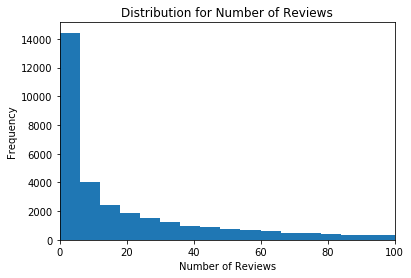

In [16]:
#distribution for the number of reviews
plt.hist(dataset1.number_of_reviews, bins = 150)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution for Number of Reviews')
plt.xlim((0,100))
plt.show()

In [17]:
print("Percentage of Airbnb home with less than 40 reviews: ", round(sum(dataset1.number_of_reviews < 40)/len(dataset1),2)*100)

print("Percentage of Airbnb home with 0 reviews: ", round(sum(dataset1.number_of_reviews == 0)/len(dataset1),2)*100)

Percentage of Airbnb home with less than 40 reviews:  74.0
Percentage of Airbnb home with 0 reviews:  17.0


As shown, 74% of hosts have less than 40 reviews with more than 50% having under 10 reviews. 17% of the host have 0 reviews on Airbnb. It's rare for host to have more than 60 reviews as the frequency of for higher numbers tappers off in a exponential decaying fashion.

Text(0.5, 1.0, 'Price Distribution')

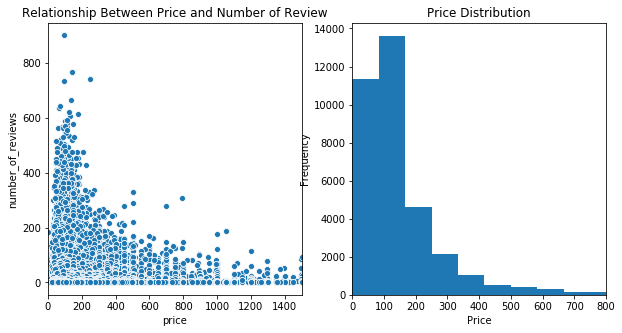

In [18]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'price', y = 'number_of_reviews', data = dataset1)
plt.xlim((0, 1500))
plt.title("Relationship Between Price and Number of Review")

plt.subplot(1,2,2)
plt.hist(dataset1.price, bins = 300)
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.xlim((0,800))
plt.title("Price Distribution")

In [19]:
percentage = round(len(dataset1[dataset1.price >= 50][dataset1.price <= 300])/len(dataset1), 4)*100
print("Airbnb for homes between 50 and 300:", percentage, '%')

at_least_one_review = dataset1[dataset1.number_of_reviews > 1]
percentage = round(len(at_least_one_review[at_least_one_review.price >= 50]
                       [at_least_one_review.price <= 300])/len(at_least_one_review), 3)*100

print("Airbnb for homes between 50 and 300 with at least one review:", percentage, '%')

zero_review = dataset1[dataset1.number_of_reviews == 0]
percentage = round(len(zero_review[zero_review.price >= 50]
                       [zero_review.price <= 300])/len(zero_review), 3)*100

print("Airbnb for homes between 50 and 300 with zero review:", percentage, '%')

Airbnb for homes between 50 and 300: 78.08 %
Airbnb for homes between 50 and 300 with at least one review: 80.9 %
Airbnb for homes between 50 and 300 with zero review: 68.8 %


C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


78% of Airbnb homes cost between \\$50 and \\$300. More interestingly if all the homes with 0 reviews were removed, that percentage increases to 81% suggesting price not only impacts how many review recieved but also whether you recieve any review at all. This is also suggested by the 15% reduction in zero review within the said range

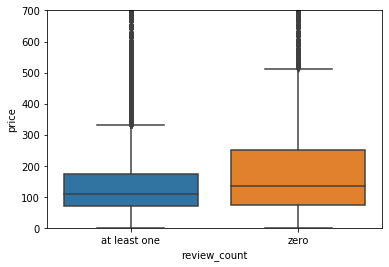

In [20]:
dataset1['review_count'] = dataset1.number_of_reviews.apply(lambda x: 'zero' if x == 0 else 'at least one' )

sns.boxplot(x = 'review_count', y = 'price', data = dataset1)
plt.ylim((0,700))
plt.show()

The boxplot further suggest the observation of the mean mentioned. The upper 50% perentile of zero review are priced higher compared to those of at least one review. Also the spread between 50% to 95% for zero review are wider than that of at least one review. This suggests that price set lower tends to have better outcome with review rates. This makes logical sense because people tends to purchase a product that has higher quality to price ratio. 

In [21]:
proportion = round(sum(dataset1.host_identity_verified == 't')/len(dataset1),3)

print("Proportion of host that are verified: ", proportion)

Proportion of host that are verified:  0.477


It's surprising that most host are not verified in Los Angeles. But how does verification impact price and number of reviews?

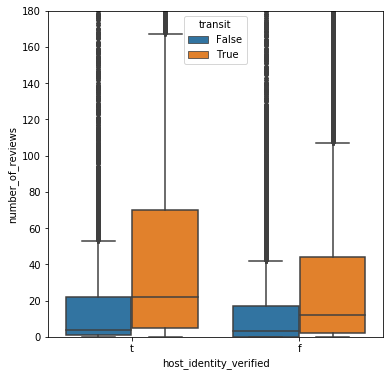

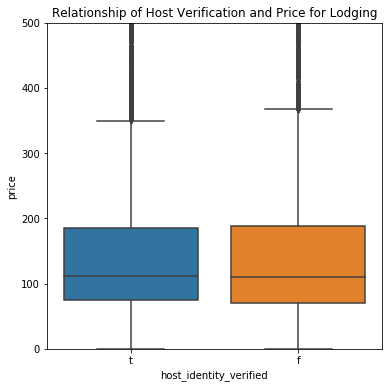

In [22]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'host_identity_verified', y = 'number_of_reviews', data = dataset1, hue = 'transit')
plt.ylim((0,180))
plt.show()

plt.figure(figsize = (6,6))
sns.boxplot(x = 'host_identity_verified', y = 'price', data = dataset1)
plt.ylim((0,500))
plt.title("Relationship of Host Verification and Price for Lodging")
plt.show()

In [23]:
mean_verified = np.mean(dataset1[dataset1.host_identity_verified == 't'].number_of_reviews)
mean_unverified = np.mean(dataset1[dataset1.host_identity_verified == 'f'].number_of_reviews)

print("Mean number of reviews for verified host: ", round(mean_verified,2))
print("Mean number of reviews for unverified host: ", round(mean_unverified,2))

Mean number of reviews for verified host:  42.9
Mean number of reviews for unverified host:  27.78


In [24]:
mean_verified = np.mean(dataset1[dataset1.host_identity_verified == 't'][dataset1.transit == True].number_of_reviews)
mean_unverified = np.mean(dataset1[dataset1.host_identity_verified == 't'][dataset1.transit == False].number_of_reviews)

print("Mean number of reviews for verified host with transit information: ", round(mean_verified,2))
print("Mean number of reviews for verified host without transit information: ", round(mean_unverified,2))

Mean number of reviews for verified host with transit information:  52.62
Mean number of reviews for verified host without transit information:  22.68


C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [25]:
Mean_verified = np.mean(dataset1[dataset1.host_identity_verified == 't'].price)
Mean_unverified = np.mean(dataset1[dataset1.host_identity_verified == 'f'].price)

print("Mean price of verified host: ", round(Mean_verified,2))
print("Mean price of unverified host: ", round(Mean_unverified,2))

Mean price of verified host:  190.85
Mean price of unverified host:  203.85


In general host identity verification appears to have an impact to the number of reviews. If the host identity is verified, the median and 75% percentile for the number of reviews tends to be higher when compared to host that didn't have their identity verified. This observation is supported by more than 50% in mean number of reviews for verified host compared to unverified host. Also if the transit information is provided, the mean number of review spikes significantly with a change of more than double comparing to that do not provide transit information

However, the median is approximately the same for both types of host. This is also true for the mean with less than 5% difference with arguably similar boxplot structure. Host verification doesn't seem to strongly affect how host price their Airbnb home but those that verified their account benefits from higher review rates. It's noted that unverified hosts statistically tend to price their home higher

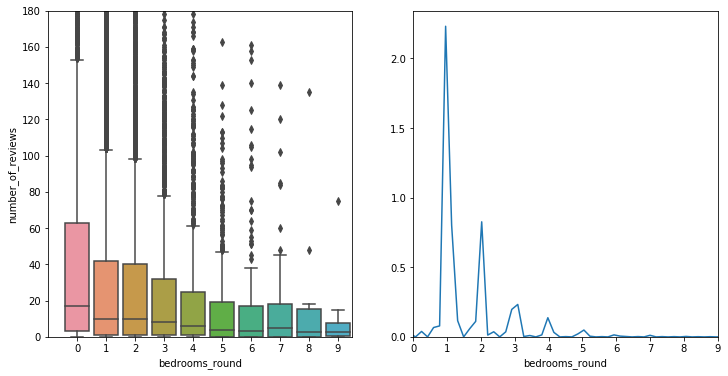

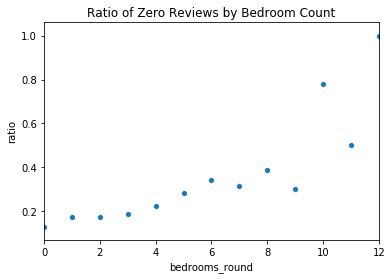

In [26]:
#bedroom were rounded up because some people offer 1.5 bedrooms
dataset1['bedrooms_round'] = dataset1.bedrooms.apply(lambda x: round(x))

fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(x = 'bedrooms_round', y = 'number_of_reviews', data = dataset1, ax = axes[0])
axes[0].set_xlim(-1,9.5)
axes[0].set_ylim(0,180)

sns.distplot(dataset1.bedrooms_round, bins = 25, ax = axes[1], hist = False)
axes[1].set_xlim(0,9)
plt.show()


#ratio between zero reviews and total review by bedrooms
zero_review = dataset1[dataset1.number_of_reviews == 0]
zero = (zero_review.groupby('bedrooms_round')['name']
        .count().rename('zero_review_by_bedrooms'))
total = (dataset1.groupby('bedrooms_round')['name']
         .count()
         .rename('total_review_by_bedrooms'))

#find the ratio between zero and total review count group by bedroom counts
ratio = (zero/total).rename('ratio').reset_index()

#plot relationship between bedrooms and the ratio
sns.scatterplot(x = 'bedrooms_round', y = 'ratio', data = ratio)
plt.xlim(0,12)
plt.title('Ratio of Zero Reviews by Bedroom Count')
plt.show()

A clear pattern for the median number of reviews and it's relationship with the bedroom count. The median number of review decreases as bedroom count increases. We can also see the volume of 1 bedroom airbnb is highest however, the ratio between zero review and total review for 1 bedrooms remains below 0.2 indicating this is the best options when host airbnb their home.

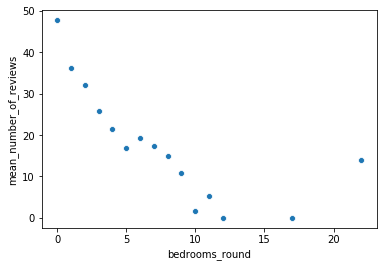

,slope,intercept,correlation,p value
0,-3.460608,39.806378,0.910931,0.000001


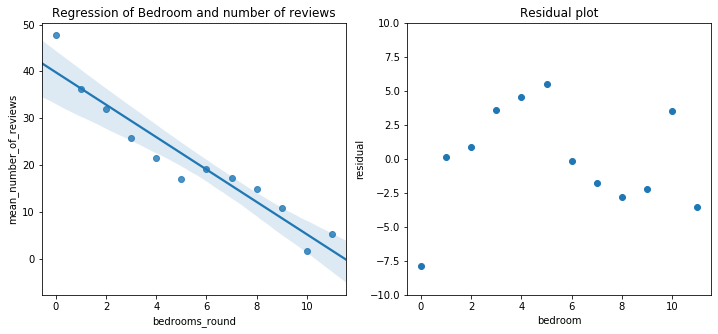

In [27]:
#group by bedrooms and find the mean of number of reviews
bedroom_mean_review = (dataset1.groupby('bedrooms_round')['number_of_reviews']
                       .mean()
                       .rename('mean_number_of_reviews')
                       .reset_index())

#find the pattern between mean number of reviews and bedroom counts
sns.scatterplot(x = 'bedrooms_round', y = 'mean_number_of_reviews', data = bedroom_mean_review)
plt.show()

#plot after removing outliers
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x = 'bedrooms_round', y = 'mean_number_of_reviews', data = bedroom_mean_review.iloc[:12, :], ax = axes[0])
axes[0].set_title('Regression of Bedroom and number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(bedroom_mean_review.bedrooms_round[:12], 
                                                  bedroom_mean_review.mean_number_of_reviews[:12])
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*bedroom_mean_review.bedrooms_round+intercept
residual = y-bedroom_mean_review.mean_number_of_reviews
axes[1].scatter(bedroom_mean_review.bedrooms_round[:12], residual[:12])
axes[1].set_title('Residual plot')
axes[1].set_xlabel('bedroom')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-10,10))
pd.DataFrame(dic)

The regression shows a strong correlation value between bedroom counts and mean of number of review. The slope indicates for every bedroom, there would be a mean reduction in review counts by 1.7. The residual plot shows randomized pattern of the residual indicating this is a good model for relationship between bedroom and mean number of review

With p value of 0.0004, the null hypothesis is rejected and that a change in bedroom counts would induce a change in number of reviews

In [28]:
print(sum(dataset1.bedrooms_round > 12))

#remove the two outliers
dataset1 = dataset1[dataset1.bedrooms_round<=12]

2


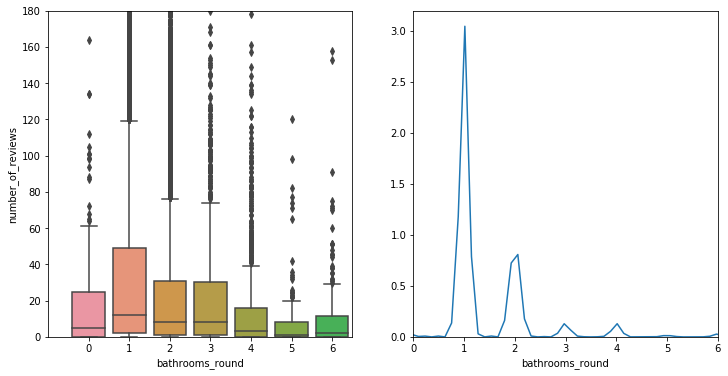

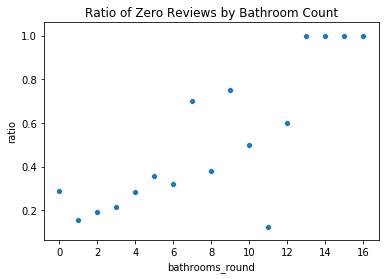

In [29]:
#round up the bathroom count to nearest integer
dataset1['bathrooms_round'] = dataset1.bathrooms.apply(lambda x: round(x))

#plot the bar graph for the for bathroom count and number of reviws
fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(x = 'bathrooms_round', y = 'number_of_reviews', data = dataset1, ax = axes[0])
axes[0].set_xlim(-1,6.5)
axes[0].set_ylim(0,180)

sns.distplot(dataset1.bathrooms_round, bins = 30, ax = axes[1], hist = False)
axes[1].set_xlim(0,6)
plt.show()

#ratio between zero reviews and total review by bedrooms
zero_review = dataset1[dataset1.number_of_reviews == 0]
zero = (zero_review.groupby('bathrooms_round')['name']
        .count().rename('zero_review_by_bathrooms'))
total = (dataset1.groupby('bathrooms_round')['name']
         .count()
         .rename('total_review_by_bathrooms'))

#find the ratio between zero and total review counts groupby bathroom counts
ratio = (zero/total).rename('ratio').reset_index()

#plot the ratio and bathroom counts
sns.scatterplot(x = 'bathrooms_round', y = 'ratio', data = ratio)
plt.title('Ratio of Zero Reviews by Bathroom Count')
plt.show()

Median number of reviews decreases as bathroom counts increases with exception of 0 bathroom. This again shows that even though bathroom of 1 is offered most on airbnb, it has the lowest zero review ratio at less than 0.2

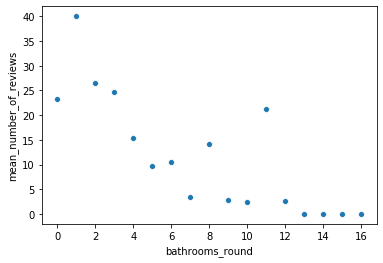

,slope,intercept,correlation,p value
0,-5.584299,40.9638,0.930258,0.000447


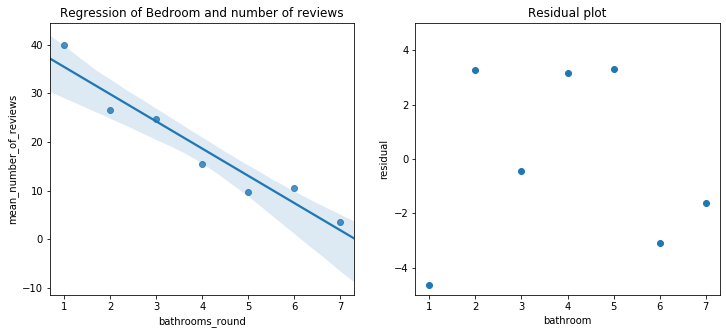

In [30]:
#find mean reviews group by bathroom
bathrooms_mean_review = (dataset1.groupby('bathrooms_round')['number_of_reviews']
                         .mean()
                         .rename('mean_number_of_reviews')
                         .reset_index())

sns.scatterplot(x = 'bathrooms_round', y = 'mean_number_of_reviews', data = bathrooms_mean_review)
plt.show()

fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x = 'bathrooms_round', y = 'mean_number_of_reviews', data = bathrooms_mean_review[1:8], ax = axes[0])
axes[0].set_title('Regression of Bedroom and number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(bathrooms_mean_review.bathrooms_round[1:8], 
                                                  bathrooms_mean_review.mean_number_of_reviews[1:8])
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*bathrooms_mean_review.bathrooms_round+intercept
residual = y-bathrooms_mean_review.mean_number_of_reviews
axes[1].scatter(bathrooms_mean_review.bathrooms_round[1:8], residual[1:8])
axes[1].set_title('Residual plot')
axes[1].set_xlabel('bathroom')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-5,5))
pd.DataFrame(dic)

From the scatter plot the relationship between bathroom and mean number of reviews could be segmented into two sections separated by 8 bathrooms. 8 and 11 bathrooms are outliers with abnormal number of average reviews. The mean number of reviews after 8 bathrooms seems to be constant at around 3, but before 8 bathrooms it exhibits strong negative linear correlation. The residual plot shows a randomized data points suggesting a good regression plot

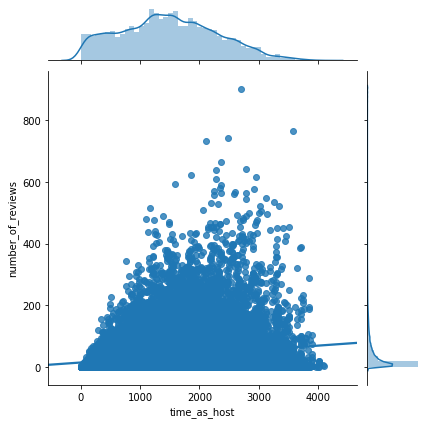

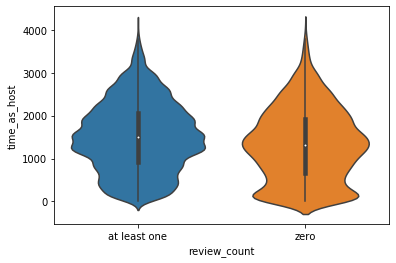

In [31]:
#relationship between time as host and number of reviews
sns.jointplot(x = 'time_as_host', y = 'number_of_reviews', data = dataset1, kind = 'reg')
plt.show()

#relationship between time as host and zero views and at least one review
sns.violinplot(x = 'review_count', y = 'time_as_host', data = dataset1)

In [32]:
zero_time = np.mean(dataset1[dataset1.review_count == 'zero'].time_as_host)
oneplus_time = np.mean(dataset1[dataset1.review_count == 'at least one'].time_as_host)

print("Mean time as host with zero review: ", round(zero_time,2), 'days')
print("Mean time as host with at least one review: ", round(oneplus_time,2), 'days')

zero_time = np.median(dataset1[dataset1.review_count == 'zero'].time_as_host)
oneplus_time = np.median(dataset1[dataset1.review_count == 'at least one'].time_as_host)

print("Median time as host with zero review: ", round(zero_time,2), 'days')
print("Median time as host with at least one review: ", round(oneplus_time,2), 'days')

Mean time as host with zero review:  1325.56 days
Mean time as host with at least one review:  1513.91 days
Median time as host with zero review:  1309.0 days
Median time as host with at least one review:  1493.0 days


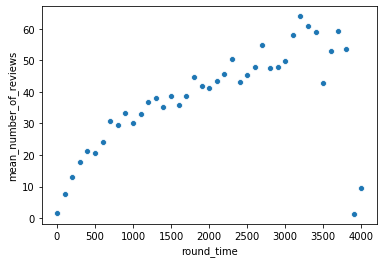

In [33]:
#create dataset segments time to 100 days and create a mean number of reviews
dataset1['round_time'] = dataset1['time_as_host'].apply(lambda x: x//100*100)
time_review = dataset1.groupby('round_time')['number_of_reviews'].mean().rename('mean_number_of_reviews').reset_index()

sns.scatterplot(x = 'round_time', y = 'mean_number_of_reviews', data = time_review)

With a few exception, the relationship between time and mean number of review is quadratic in appearance. We can apply a transformation method to create a linear relationship. Since we do not want to change number of reviews in the general dataset, lets transform the time by square rooting the values

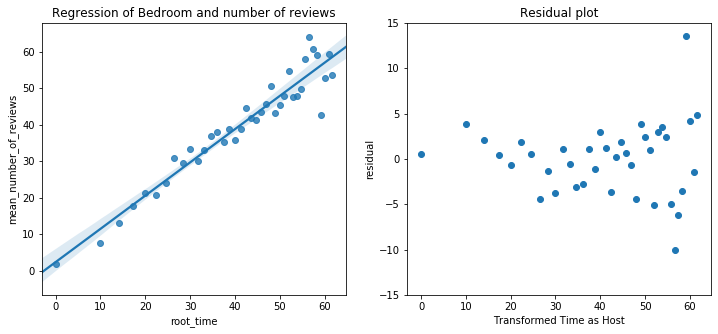

,slope,intercept,correlation,p value
0,0.910441,2.364439,0.926868,1.307654e-22


In [34]:
remove = []
for number in time_review.index:
    #condition for removing points
    if (time_review.iloc[number, :].round_time > 3000) and (time_review.iloc[number, :].mean_number_of_reviews < 20):
        remove.append(number)

#remove the two data points
time_review = time_review.drop(index = remove)

#apply square root transformation
time_review['root_time'] = time_review.round_time.apply(lambda x: np.sqrt(x))

#plot the regression plot
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x = 'root_time', y = 'mean_number_of_reviews', data = time_review, ax = axes[0])
axes[0].set_title('Regression of Bedroom and number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(time_review.root_time, 
                                                  time_review.mean_number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*time_review.root_time+intercept
residual = y-time_review.mean_number_of_reviews
axes[1].scatter(time_review.root_time, residual)
axes[1].set_title('Residual plot')
axes[1].set_xlabel('Transformed Time as Host')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-15,15))
plt.show()
pd.DataFrame(dic)

The regression plot after transformation exhibit very strong correlation between time as host and mean number of reviews. It shows that the mean number of reviews increases by one for every square root of time as host. The residual plot also shows randomized pattern suggesting that there may not be any underlying pattern.

In [35]:
#transform time_as_host in the official dataset
dataset1['time_as_host'] = dataset1.time_as_host.apply(lambda x: np.sqrt(x))

In [36]:
#statistical analysis of linear regression for the actual data after transformation
slope, intercept, r, p, stderr = stats.linregress(dataset1.time_as_host, 
                                                  dataset1.number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}
pd.DataFrame(dic)

,slope,intercept,correlation,p value
0,0.977817,-0.790573,0.03732,6.761886e-294


With very low p-value, we reject the null hypothesis that time as host is independent from number of reviews. Correlation is measured far lower at 0.038

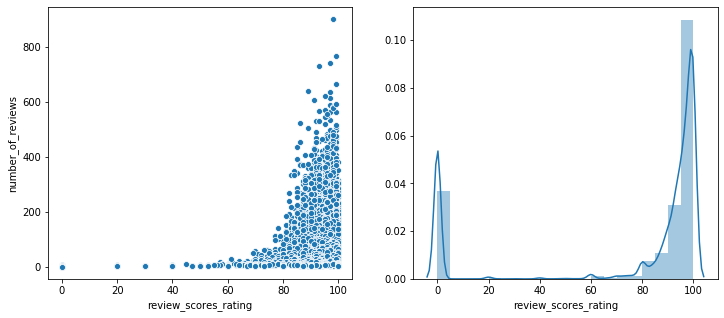

In [37]:
#review scores rating and number of reviews plots
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = 'review_scores_rating', y = 'number_of_reviews', data = dataset1, ax = axes[0])

sns.distplot(dataset1.review_scores_rating, bins = 20, ax = axes[1])

In [38]:
high_review_score = sum(dataset1.review_scores_rating >=90)/len(dataset1)

print('Ratio of Airbnb home with 90 or higher review scores:', round(high_review_score,2))

Ratio of Airbnb home with 90 or higher review scores: 0.7


First to clarify, the 0 review score rating corresponds to the data manipulation we conducted where we filled the null values with 0. However, it should be note that as the rating score increase, the maximum number of reviews increases accordingly and the increased could be discribed as an exponential increase in max value. Also most airbnb homes scores higher than 90 in their ratings. It's good to note that if an airbnb home scores below 80, it would be difficult for the home to have high review counts.

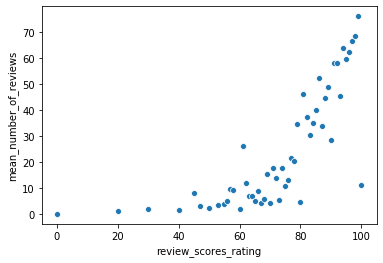

In [39]:
#group by review score and calculate mean for number of reviews
rating = dataset1.groupby('review_scores_rating')['number_of_reviews'].mean().rename('mean_number_of_reviews').reset_index()

sns.scatterplot(x ='review_scores_rating', y = 'mean_number_of_reviews', data = rating)

The mean number of reviews exhibit similar behavior as the max values in the scatter plot seen prior. There is a clear exponential increase in mean number of review and we can transform the data to reflect the linear regression model. However, we must drop the number of review for 100 as it deviates substantally from the general trend

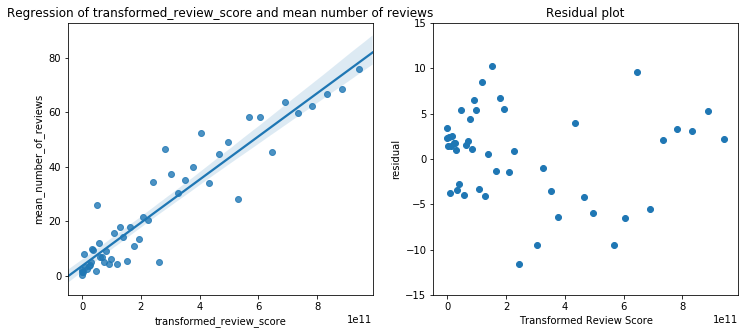

,slope,intercept,correlation,p value
0,7.923225e-11,3.545343,0.888148,1.954559e-25


In [40]:
#drop the last review and transformed review score
rating = rating.drop(index = len(rating)-1)
rating['transformed_review_score'] = rating['review_scores_rating'].apply(lambda x: x**6)

#plot the regression plot
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x ='transformed_review_score', y = 'mean_number_of_reviews', data = rating, ax = axes[0])
axes[0].set_title('Regression of transformed_review_score and mean number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(rating.transformed_review_score, 
                                                  rating.mean_number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*rating.transformed_review_score+intercept
residual = y-rating.mean_number_of_reviews
axes[1].scatter(rating.transformed_review_score, residual)
axes[1].set_title('Residual plot')
axes[1].set_xlabel('Transformed Review Score')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-15,15))
plt.show()
pd.DataFrame(dic)

Strong linear correlation between transformed review score and mean number of reviews. The review score was raised to the power of 6 to have this linear affect. The residual plot shows no apparent pattern suggesting this is a good model

In [41]:
#apply transformation to review score
dataset1['review_scores_rating'] = dataset1.review_scores_rating.apply(lambda x: x**6)

In [42]:
#statistical analysis of linear regression for actual data
slope, intercept, r, p, stderr = stats.linregress(dataset1.review_scores_rating, 
                                                  dataset1.number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}
pd.DataFrame(dic)

,slope,intercept,correlation,p value
0,3.768216e-11,11.423258,0.052376,0.0


The p-value for the transformation is 0 which we can reject the null hypothesis. The slope is extremely small because this is a tranformed dataset where we raised the review score rate to the 6th power. However, the correlation value is small

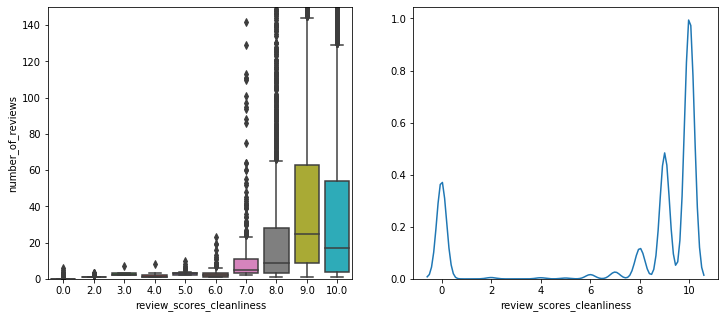

In [43]:
fig, axes = plt.subplots(1,2, figsize = (12,5))

#score of the cleaniness and number of reviews
sns.boxplot(x = 'review_scores_cleanliness', y = 'number_of_reviews', data = dataset1, ax = axes[0])
axes[0].set_ylim((0,150))

#distribution of the score for cleaniness
sns.distplot(dataset1.review_scores_cleanliness, hist = False, ax = axes[1])

Again the 0 review scores are filled data. However it's clear that very few airbnb home exhibit cleaniness score of less than 8 and according to the bar graph, a score less than 6 would result in low median number of reviews

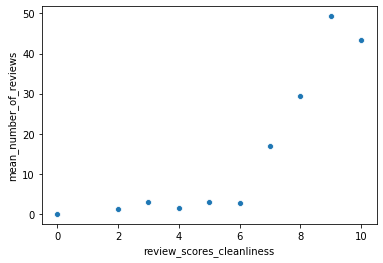

In [44]:
#group by score for cleaniness and number of reviews
rating = (dataset1.groupby('review_scores_cleanliness')['number_of_reviews']
          .mean()
          .rename('mean_number_of_reviews')
          .reset_index())

sns.scatterplot(x ='review_scores_cleanliness', y = 'mean_number_of_reviews', data = rating)

The cleaniness score appears to have similar pattern as the overall score with an exponential increase in mean number of reviews as a function of cleaniness

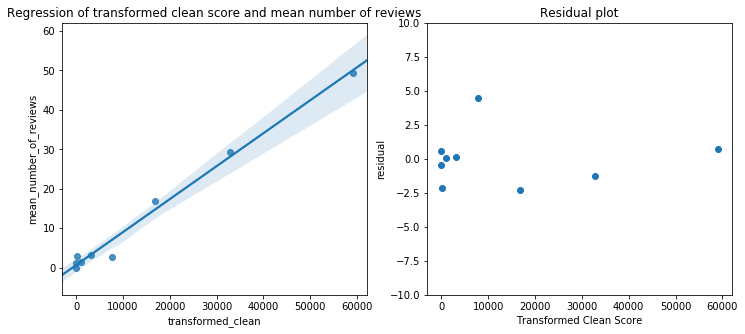

,slope,intercept,correlation,p value
0,0.000835,0.697885,0.986101,9.262742e-08


In [45]:
rating = rating.drop(index = len(rating)-1)
rating['transformed_clean'] = rating['review_scores_cleanliness'].apply(lambda x: x**5)

#plot the regression plot
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x ='transformed_clean', y = 'mean_number_of_reviews', data = rating, ax = axes[0])
axes[0].set_title('Regression of transformed clean score and mean number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(rating.transformed_clean, 
                                                  rating.mean_number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*rating.transformed_clean+intercept
residual = y-rating.mean_number_of_reviews
axes[1].scatter(rating.transformed_clean, residual)
axes[1].set_title('Residual plot')
axes[1].set_xlabel('Transformed Clean Score')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-10,10))
plt.show()
pd.DataFrame(dic)

Again strong linear correlation between transformed clean score and mean number of reviews. The review score was raised to the power of 5 to have this linear affect. The residual plot shows no apparent pattern suggesting this is a good model. This may have too strong of a correlation to overall review score and may affect machine learning models

In [46]:
#transform cleanliness score data
dataset1['review_scores_cleanliness'] = dataset1.review_scores_cleanliness.apply(lambda x: x**5)

In [47]:
#statistical analysis of linear regression for actual data
slope, intercept, r, p, stderr = stats.linregress(dataset1.review_scores_cleanliness, 
                                                  dataset1.number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}
pd.DataFrame(dic)

,slope,intercept,correlation,p value
0,0.000387,9.583203,0.063507,0.0


The p-value for the transformation is 0 which we can reject the null hypothesis. The slope is extremely small because this is a tranformed dataset where we raised the review score rate to the 5th power. However, the correlation value is small

In [48]:
#count the bigram words in bigram name
cnt_bigram_name = Counter()
for row in dataset1.bigram_name:
    for bigram in row:
        cnt_bigram_name[bigram]+=1

[Text(0, 0, "('private', 'room')"),
 Text(0, 0, "('beverly', 'hill')"),
 Text(0, 0, "('los', 'angeles')"),
 Text(0, 0, "('venice', 'beach')"),
 Text(0, 0, "('guest', 'house')"),
 Text(0, 0, "('hollywood', 'hill')"),
 Text(0, 0, "('west', 'hollywood')"),
 Text(0, 0, "('downtown', 'la')"),
 Text(0, 0, "('santa', 'monica')"),
 Text(0, 0, "('private', 'bedroom')"),
 Text(0, 0, "('ocean', 'view')"),
 Text(0, 0, "('echo', 'park')"),
 Text(0, 0, "('one', 'bedroom')"),
 Text(0, 0, "('heart', 'hollywood')"),
 Text(0, 0, "('long', 'beach')")]

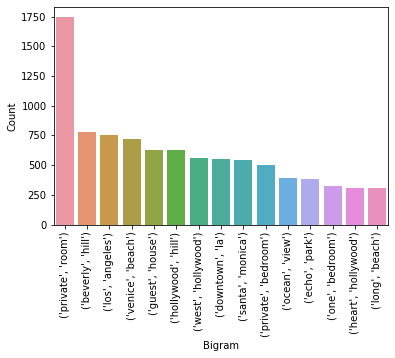

In [49]:
Frame = pd.DataFrame(cnt_bigram_name.most_common(15))
Frame.columns = ['Bigram', 'Count']
g = sns.barplot(x = 'Bigram', y = 'Count', data = Frame)
g.set_xticklabels(labels = Frame.Bigram, rotation=90)

Almost all the words mentioned are location dependent. But 'private room' and 'master bedroom' seems to be very common bigrams.
How does the words in the general trend differ from those with zero reviews and those that have at least 1 reviews?

In [50]:
#count the bigram words in bigram name
cnt_zero = Counter()
for row in zero_review.bigram_name:
    for bigram in row:
        cnt_zero[bigram]+=1
        
cnt_one_more = Counter()
for row in at_least_one_review.bigram_name:
    for bigram in row:
        cnt_one_more[bigram]+=1

Text(0.5, 1.0, 'At Least One Review')

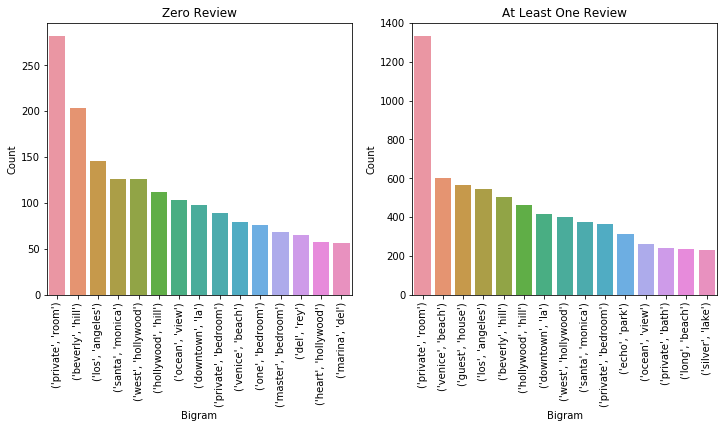

In [51]:
zero_Frame = pd.DataFrame(cnt_zero.most_common(15))
zero_Frame.columns = ['Bigram', 'Count']

more_Frame = pd.DataFrame(cnt_one_more.most_common(15))
more_Frame.columns = ['Bigram', 'Count']

fig, axes = plt.subplots(1,2, figsize = (12,5))
g = sns.barplot(x = 'Bigram', y = 'Count', data = zero_Frame, ax = axes[0])
g.set_xticklabels(labels = zero_Frame.Bigram, rotation=90)
g.set_title('Zero Review')

g = sns.barplot(x = 'Bigram', y = 'Count', data = more_Frame, ax = axes[1])
g.set_xticklabels(labels = more_Frame.Bigram, rotation=90)
g.set_title('At Least One Review')

Both bigram shares similar trends with primarly location oriented words. Lets look at the highest ratio of  zero review bigram to at least one review bigram

Text(0.5, 1.0, 'Bigram with Highest Zero Review Ratio')

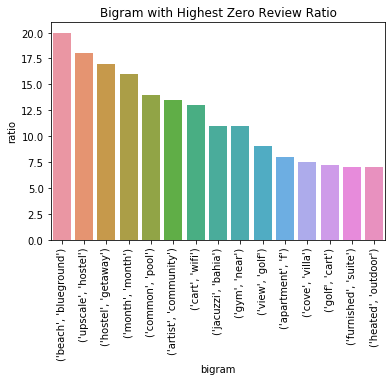

In [52]:
ratio_bigram = []
for bigram, value in cnt_one_more.items():
    if bigram in cnt_zero:
        ratio_bigram.append([bigram, cnt_zero[bigram]/value])
    else:
        ratio_bigram.append([bigram,0])
ratio_bigram.sort(key = lambda x: x[1], reverse = True)

ratio_frame = pd.DataFrame(ratio_bigram)
ratio_frame.columns = ['bigram', 'ratio']

g = sns.barplot(x = 'bigram', y = 'ratio', data = ratio_frame.iloc[:15])
g.set_xticklabels(labels = ratio_frame.iloc[:15].bigram, rotation=90)
g.set_title('Bigram with Highest Zero Review Ratio')

Phrases that tends to have high zero review to at least one review ratio tends places that seems low scale with words like "hostel" and suite and words that seems to communicate sharing the space like "common". The word "gym" doesn't seem favorable too.

<a id='Learning'></a>